# Predict Damage to a building after an Earthquake 

## Problem Statement


Determining the degree of damage that is done to buildings post an earthquake can help identify safe and unsafe buildings, thus avoiding death and injuries resulting from aftershocks.  Leveraging the power of machine learning is one viable option that can potentially prevent massive loss of lives while simultaneously making rescue efforts easy and efficient.

In this challenge we are provided with the before and after details of nearly one million buildings after an earthquake. The damage to a building is categorized in __five grades__. Each grade depicts the extent of damage done to a building post an earthquake.

Given building details,__ our task is to build a model that can predict the extent of damage that has been done to a building after an earthquake.__

## Data Variables Description:


__area_assesed__ : Indicates the nature of the damage assessment in terms of the areas of the building that were assessed

__building_id__: A unique ID that identifies every individual building

__damage_grade__: Damage grade assigned to the building after assessment (Target Variable)

__district_id__: District where the building is located

__has_geotechnical_risk__: Indicates if building has geotechnical risks

__has_geotechnical_risk_fault_crack__: Indicates if building has geotechnical risks related to fault cracking

__has_geotechnical_risk_flood__: Indicates if building has geotechnical risks related to flood

__ has_geotechnical_risk_land_settlement__: Indicates if building has geotechnical risks related to land settlement

__has_geotechnical_risk_landslide__: Indicates if building has geotechnical risks related to landslide

__has_geotechnical_risk_liquefaction__: Indicates if building has geotechnical risks related to liquefaction

__has_geotechnical_risk_other__: Indicates if building has any other  geotechnical risks

__has_geotechnical_risk_rock_fall__: Indicates if building has geotechnical risks related to rock fall

__has_repair_started__: Indicates if the repair work had started

__vdcmun_id__: Municipality where the building is located

*__code by__* : [Brungi Vishwa Sourab](https://www.brungivishwasourab.com)

## Import Necessary Libraries

In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

Using TensorFlow backend.


## Import Datasets

In [2]:
#importing the datasets
train_df_first=pd.read_csv('data/train.csv')
test_df=pd.read_csv('data/test.csv')
building_ownership_df_first=pd.read_csv('data/Building_Ownership_Use.csv')
building_structure_df_first=pd.read_csv('data/Building_Structure.csv')

In [3]:
train_df_first.head()

,area_assesed,building_id,damage_grade,district_id,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,has_geotechnical_risk_other,has_geotechnical_risk_rock_fall,has_repair_started,vdcmun_id
0,Both,24385bfd2a2,Grade 4,24,0.0,0,0,0,0,0,0,0,0.0,2489
1,Both,405d1bbebbf,Grade 2,44,0.0,0,0,0,0,0,0,0,1.0,4423
2,Both,351d9bc71f6,Grade 1,36,0.0,0,0,0,0,0,0,0,0.0,3650
3,Building removed,2be3a971166,Grade 5,30,0.0,0,0,0,0,0,0,0,0.0,3016
4,Both,34c7d073ea6,Grade 3,36,0.0,0,0,0,0,0,0,0,0.0,3627


## Preprocess the datasets - (Remove/Fill Null Values)

In [4]:
train_df_first['has_repair_started']=train_df_first['has_repair_started'].fillna(0)

In [5]:
building_ownership_df_first['count_families']=building_ownership_df_first['count_families'].fillna(1)
#fill the null values with mode i.e 0
building_ownership_df_first['has_secondary_use']=building_ownership_df_first['has_secondary_use'].fillna(0)
building_ownership_df_first.head()

,building_id,district_id,vdcmun_id,ward_id,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,a3380c4f75,7,701,70102,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
1,a3380c4fd9,7,701,70102,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
2,a3380c503e,7,701,70102,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
3,a338a4e5f2,7,701,70103,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
4,a338a4e653,7,701,70103,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0


In [6]:
building_structure_df_first=building_structure_df_first.replace({'condition_post_eq':{'Damaged-Repaired and used':'Damaged Repaired and used','Damaged-Rubble unclear':'Damaged Rubble unclear','Damaged-Rubble Clear-New building built':'Damaged Rubble Clear New building built','Damaged-Not used':'Damaged Not used','Damaged-Rubble clear':'Damaged Rubble clear','Damaged-Used in risk':'Damaged Used in risk'}})

building_structure_df_first=building_structure_df_first.replace({'foundation_type':{'Mud mortar-Stone/Brick':'Mud mortar Stone or Brick','Cement-Stone/Brick':'Cement Stone or Brick','Bamboo/Timber':'Bamboo or Timber'}})

building_structure_df_first=building_structure_df_first.replace({'roof_type':{'Bamboo/Timber-Light roof':'Bamboo or Timber Light roof','RCC/RB/RBC':'RCC or RB or RBC','Bamboo/Timber-Heavy roof':'Bamboo or Timber Heavy roof'}})

building_structure_df_first=building_structure_df_first.replace({'ground_floor_type':{'Brick/Stone':'Brick or Stone'}})

building_structure_df_first=building_structure_df_first.replace({'other_floor_type':{'TImber/Bamboo-Mud':'TImber or Bamboo Mud','Timber-Planck':'Timber Planck','RCC/RB/RBC':'RCC or RB or RBC'}})

building_structure_df_first=building_structure_df_first.replace({'position':{'Attached-1 side':'Attached 1 side','Attached-2 side':'Attached 2 side','Attached-3 side':'Attached 3 side'}})

building_structure_df_first=building_structure_df_first.replace({'plan_configuration':{'L-shape':'L shape','T-shape':'T shape','U-shape':'U shape','Multi-projected':'Multi projected','E-shape':'E shape','H-shape':'H shape'}})

#fill null values with most occuring values
building_structure_df_first['position']=building_structure_df_first['position'].fillna('Not attached')
building_structure_df_first['plan_configuration']=building_structure_df_first['plan_configuration'].fillna('Rectangular')

In [7]:
building_structure_df_first.head()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,...,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq
0,a3380c4f75,7,701,70102,1,1,28,454,9,9,...,0,0,0,0,1,1,0,0,1,Damaged Repaired and used
1,a3380c4fd9,7,701,70102,1,1,32,324,9,9,...,0,0,0,0,1,1,0,0,1,Damaged Repaired and used
2,a3380c503e,7,701,70102,2,2,34,456,18,18,...,0,0,0,0,1,1,0,0,1,Damaged Repaired and used
3,a338a4e5f2,7,701,70103,2,2,20,452,18,18,...,0,0,0,0,1,1,0,0,1,Damaged Repaired and used
4,a338a4e653,7,701,70103,1,0,25,542,9,0,...,0,0,0,0,1,1,0,0,1,Damaged Rubble unclear


In [8]:
test_df['has_repair_started']=test_df['has_repair_started'].fillna(0)

## Merge all other datasets with train and test data

In [9]:
#merge two building datasets on common column i.e building_id
buildings_other_df=pd.merge(building_ownership_df_first,building_structure_df_first,on="building_id")
final_test_df=pd.merge(test_df,buildings_other_df,how="left",on="building_id")
building_id=final_test_df['building_id']
final_test_df=final_test_df.drop('building_id',axis=1)
final_train_df=pd.merge(train_df_first,buildings_other_df,how="left",on="building_id")


In [11]:
damage_grade=pd.DataFrame(final_train_df.damage_grade)
damage_grade.head()

,damage_grade
0,Grade 4
1,Grade 2
2,Grade 1
3,Grade 5
4,Grade 3


In [15]:
damage_grade_one_hot=pd.get_dummies(damage_grade)
damage_grade_one_hot.head()

,1,2,3,4,5
0,0,0,0,1,0
1,0,1,0,0,0
2,1,0,0,0,0
3,0,0,0,0,1
4,0,0,1,0,0


In [16]:
#drop building id and damage grade from the train data
final_train_df=final_train_df.drop('building_id',axis=1)
final_train_df=final_train_df.drop('damage_grade',axis=1)
final_train_df.head()

,area_assesed,district_id,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,has_geotechnical_risk_other,has_geotechnical_risk_rock_fall,...,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq
0,Both,24,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Damaged Not used
1,Both,44,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,Damaged Repaired and used
2,Both,36,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,Not damaged
3,Building removed,30,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Damaged Rubble clear
4,Both,36,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Damaged Used in risk


## One-Hot Encode the train and test data

In [17]:
final_train_encoded_features=pd.get_dummies(final_train_df)
final_test_encoded_features=pd.get_dummies(final_test_df)
final_train, final_test = final_train_encoded_features.align(final_test_encoded_features,
                                                                    join='left', 
                                                                    axis=1)

In [18]:
encoded=list(final_train.columns)
print('{} No of columns in train after one hot encoding'. format(len(encoded)))

97 No of columns in train after one hot encoding


In [19]:
encoded_2=list(final_test.columns)
print('{} No of columns in test after one hot encoding'. format(len(encoded_2)))

97 No of columns in test after one hot encoding


In [ ]:
#final_train.columns
final_train.describe()

## Normalize Numerical Data

In [20]:

scaler=MinMaxScaler()
final_scaled_train=pd.DataFrame(scaler.fit_transform(final_train))
final_scaled_train.columns=final_train.columns
final_scaled_train.head()

,district_id,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,has_geotechnical_risk_other,has_geotechnical_risk_rock_fall,has_repair_started,...,plan_configuration_T shape,plan_configuration_U shape,condition_post_eq_Covered by landslide,condition_post_eq_Damaged Not used,condition_post_eq_Damaged Repaired and used,condition_post_eq_Damaged Rubble Clear New building built,condition_post_eq_Damaged Rubble clear,condition_post_eq_Damaged Rubble unclear,condition_post_eq_Damaged Used in risk,condition_post_eq_Not damaged
0,0.386364,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.840909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.659091,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.522727,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.659091,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [21]:
final_scaled_test=pd.DataFrame(scaler.fit_transform(final_test))
final_scaled_test.columns=final_test.columns
final_scaled_test.head()

,district_id,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,has_geotechnical_risk_other,has_geotechnical_risk_rock_fall,has_repair_started,...,plan_configuration_T shape,plan_configuration_U shape,condition_post_eq_Covered by landslide,condition_post_eq_Damaged Not used,condition_post_eq_Damaged Repaired and used,condition_post_eq_Damaged Rubble Clear New building built,condition_post_eq_Damaged Rubble clear,condition_post_eq_Damaged Rubble unclear,condition_post_eq_Damaged Used in risk,condition_post_eq_Not damaged
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [22]:
final_scaled_train.to_csv('processed_data/final_scaled_train.csv',index=False)
final_scaled_test.to_csv('processed_data/final_scaled_test.csv',index=False)

In [ ]:
final_scaled_train.shape

## Split train and test data

In [23]:
X_train,X_test,y_train,y_test=train_test_split(final_scaled_train,damage_grade_one_hot,test_size=0.25)

## Neural Network/ MLP

In [25]:
keras_model= Sequential()

keras_model.add(Dense(256,input_shape=X_train.shape[1:],activation='relu'))
keras_model.add(Dense(128,activation='relu'))
keras_model.add(Dense(64,activation='relu'))
keras_model.add(Dense(32,activation='relu'))
keras_model.add(Dense(16,activation='relu'))
keras_model.add(Dense(5,activation='softmax'))

keras_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               25088     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_6 (Dense)              (None, 5)                 85        
Total params: 68,933
Trainable params: 68,933
Non-trainable params: 0
_________________________________________________________________


In [26]:
keras_model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

In [27]:
import time
epochs=10

checkpointer = ModelCheckpoint(filepath='saved_models/keras_model_best_weights.hdf5', 
                               verbose=1, save_best_only=True)
start=time.time()

print("Training Keras Model:")

history= keras_model.fit(X_train,y_train,validation_data=(X_test, y_test),epochs=epochs,
                         callbacks=[checkpointer], verbose=1)

end=time.time()

total_time=end-start
print("Time Taken(in Minutes) to Train the Model:", total_time/60)

Training Keras Model:
Train on 473820 samples, validate on 157941 samples
Epoch 1/10
473820/473820 [==============================] - 39s 82us/step - loss: 0.6857 - acc: 0.6879 - val_loss: 0.6414 - val_acc: 0.7073

Epoch 00001: val_loss improved from inf to 0.64144, saving model to saved_models/keras_model_best_weights.hdf5
Epoch 2/10
473820/473820 [==============================] - 37s 77us/step - loss: 0.6400 - acc: 0.7072 - val_loss: 0.6321 - val_acc: 0.7115

Epoch 00002: val_loss improved from 0.64144 to 0.63206, saving model to saved_models/keras_model_best_weights.hdf5
Epoch 3/10
473820/473820 [==============================] - 37s 78us/step - loss: 0.6319 - acc: 0.7107 - val_loss: 0.6543 - val_acc: 0.7027

Epoch 00003: val_loss did not improve from 0.63206
Epoch 4/10
473820/473820 [==============================] - 37s 77us/step - loss: 0.6273 - acc: 0.7135 - val_loss: 0.6250 - val_acc: 0.7152

Epoch 00004: val_loss improved from 0.63206 to 0.62497, saving model to saved_models/

In [29]:
keras_model.load_weights('saved_models/keras_model_best_weights.hdf5')

accuracy_1=keras_model.evaluate(x=X_test,y=y_test,batch_size=32)
print("Accuracy of Keras model : ",accuracy_1[1])

157941/157941 [==============================] - 4s 24us/step
Accuracy of Keras model :  0.7188950304238849


In [42]:
predictions_keras=keras_model.predict_classes(X_test)

In [43]:
predictions_keras

array([3, 4, 1, ..., 4, 4, 0])

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


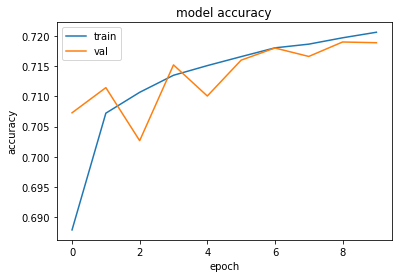

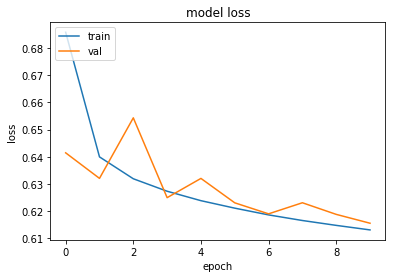

In [32]:

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Random Forest Model

In [38]:

random_forest_model=RandomForestClassifier(n_estimators=400,min_samples_split=3,random_state=120)
random_forest_model.fit(X_train,y_train)
predictions_random_forest_model=random_forest_model.predict(X_test)
random_model_f1_score=f1_score(y_test,predictions_random_forest_model,average='weighted')
random_model_f1_score

0.7535596808882193

In [48]:
feature_importances = pd.DataFrame(random_forest_model.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

In [49]:
feature_importances.head(10)

,importance
height_ft_post_eq,0.120426
count_floors_post_eq,0.111310
condition_post_eq_Not damaged,0.054922
age_building,0.050770
plinth_area_sq_ft,0.049867
ward_id_x,0.047228
ward_id_y,0.046001
area_assesed_Both,0.044097
condition_post_eq_Damaged Not used,0.037066
area_assesed_Building removed,0.035681


<Container object of 97 artists>

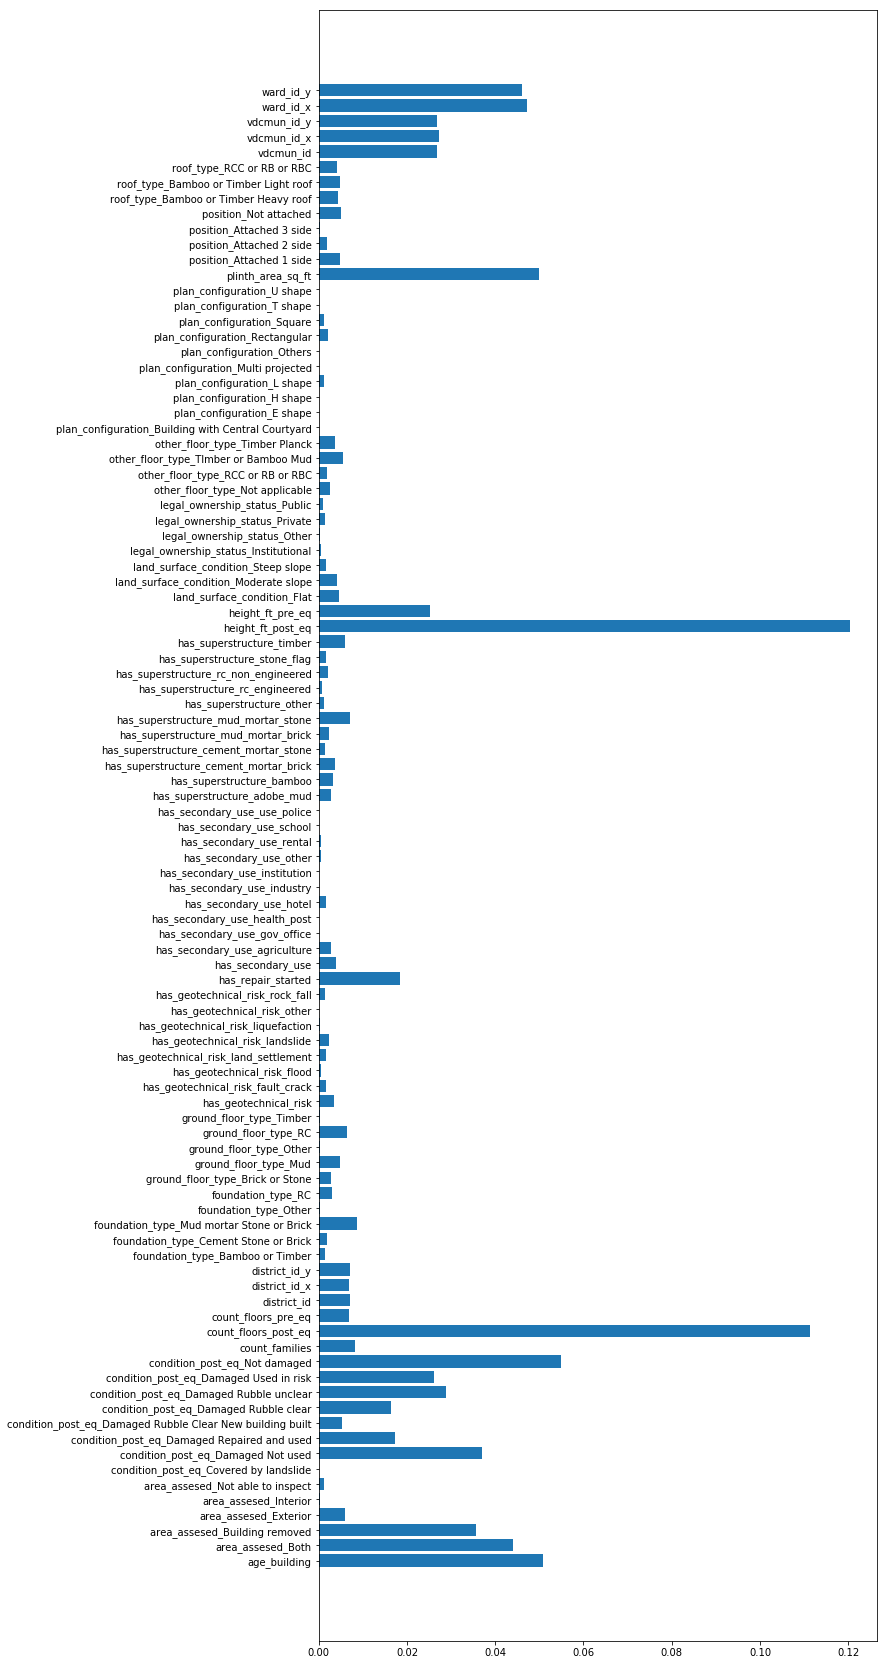

In [59]:

plt.figure(figsize=(10,30))
plt.barh(feature_importances.index,feature_importances.importance)

#### Thank You for your time :) 

#### Contact Me through my [Website](https://brungivishwasourab.com) 